# 1. Word Embeddings and Vector Representations

# Exercise 1: One-hot Encoding and TF-IDF

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

text = """Down the road from the gate they fled. In fifty paces, with a swift
bend round a jutting bastion of the cliff, it took them out of sight
from the Tower. They had escaped for the moment. Cowering back
against the rock they drew breath, and then they clutched at their
hearts. Perching now on the wall beside the ruined gate the Nazguˆl
sent out its deadly cries. All the cliffs echoed.
In terror they stumbled on. Soon the road bent sharply eastward
again and exposed them for a dreadful moment to view from the
Tower. As they flitted across they glanced back and saw the great
black shape upon the battlement; then they plunged down between
high rock-walls in a cutting that fell steeply to join the Morgul-road.
They came to the way-meeting. There was still no sign of orcs, nor
of an answer to the cry of the Nazguˆl; but they knew that the silence
would not last long. At any moment now the hunt would begin."""

sentences = text.split('.')
sentences = [sentence.replace('\n', ' ') for sentence in sentences]

In [18]:
# One-hot Encoding
count_vectorizer = CountVectorizer(binary=True)
one_hot = count_vectorizer.fit_transform(sentences)

one_hot_df = pd.DataFrame(one_hot.toarray(), columns=count_vectorizer.get_feature_names_out())
print("One-hot Encoding:")
print(one_hot_df)


One-hot Encoding:
    across  again  against  all  an  and  answer  any  as  at  ...  took  \
0        0      0        0    0   0    0       0    0   0   0  ...     0   
1        0      0        0    0   0    0       0    0   0   0  ...     1   
2        0      0        0    0   0    0       0    0   0   0  ...     0   
3        0      0        1    0   0    1       0    0   0   1  ...     0   
4        0      0        0    0   0    0       0    0   0   0  ...     0   
5        0      0        0    1   0    0       0    0   0   0  ...     0   
6        0      0        0    0   0    0       0    0   0   0  ...     0   
7        0      1        0    0   0    1       0    0   0   0  ...     0   
8        1      0        0    0   0    1       0    0   1   0  ...     0   
9        0      0        0    0   0    0       0    0   0   0  ...     0   
10       0      0        0    0   1    0       1    0   0   0  ...     0   
11       0      0        0    0   0    0       0    1   0   1  ...    

In [17]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF scores:")
print(tfidf_df)


TF-IDF scores:
      across     again   against       all        an       and    answer  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.290692  0.000000  0.000000  0.222294  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.563124  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.270579  0.000000  0.000000  0.000000  0.206914  0.000000   
8   0.186173  0.000000  0.000000  0.000000  0.000000  0.142368  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.192235  0.000000  0.192235   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 

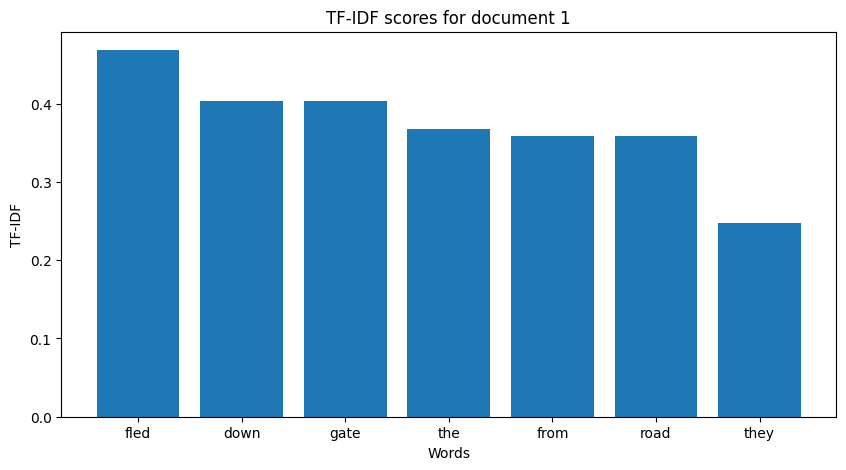

In [12]:
# Визуализируем TF-IDF для первого документа
doc_index = 0  # первое предложение
tfidf_scores = tfidf_matrix[doc_index].toarray().flatten()
words = tfidf_vectorizer.get_feature_names_out()

# В DataFrame
tfidf_scores_df = pd.DataFrame({'word': words, 'tfidf': tfidf_scores})
tfidf_scores_df = tfidf_scores_df[tfidf_scores_df['tfidf'] > 0]

# Сортировка
tfidf_scores_df = tfidf_scores_df.sort_values(by='tfidf', ascending=False)

# График
plt.figure(figsize=(10, 5))
plt.bar(tfidf_scores_df['word'], tfidf_scores_df['tfidf'])
plt.title('TF-IDF scores for document 1')
plt.xlabel('Words')
plt.ylabel('TF-IDF')
plt.show()


# Exercise 2: Word2Vec (CBOW, Skip-gram)

In [13]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#Tokenization
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# CBOW (sg=0)
model_cbow = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=3, min_count=1, sg=0, seed=42)

# Skip-gram (sg=1)
model_skipgram = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=3, min_count=1, sg=1, seed=42)


# Примеры слов для сравнения
word_1 = 'rock-walls'
word_2 = 'tower'

sim_cbow = model_cbow.wv.similarity(word_1, word_2)
sim_skipgram = model_skipgram.wv.similarity(word_1, word_2)

print(f"CBOW similarity ({word_1}, {word_2}): {sim_cbow:.4f}")
print(f"Skip-gram similarity ({word_1}, {word_2}): {sim_skipgram:.4f}")


CBOW similarity (rock-walls, tower): 0.1660
Skip-gram similarity (rock-walls, tower): 0.1696


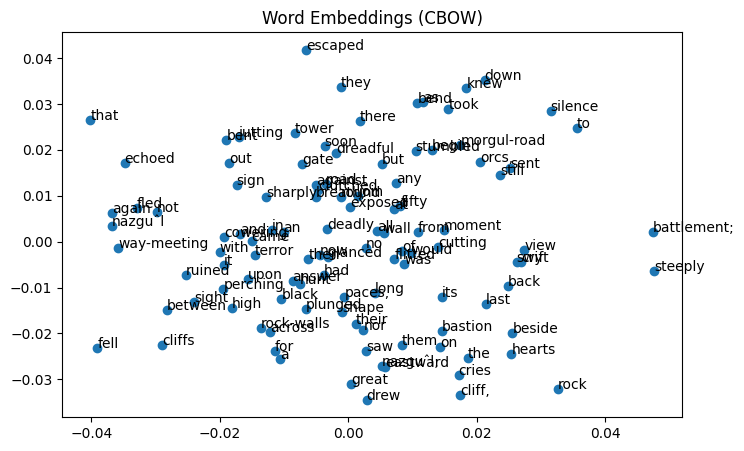

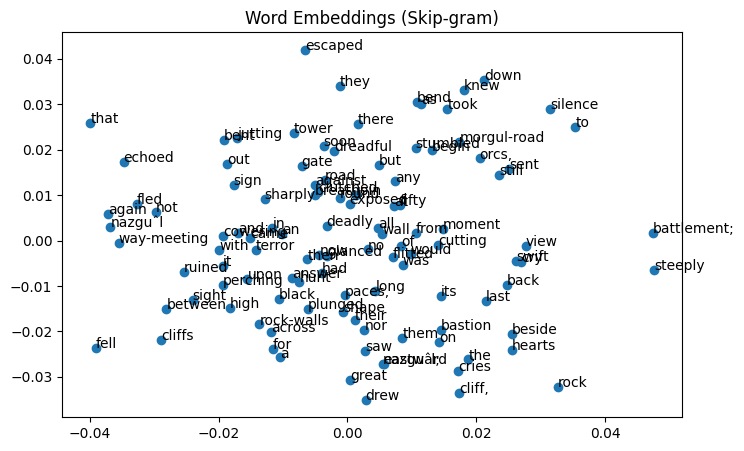

In [14]:
def plot_embeddings(model, title):
    words = list(model.wv.index_to_key)
    word_vectors = np.array([model.wv[word] for word in words])

    # PCA до 2D
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(word_vectors)

    # Отрисовка
    plt.figure(figsize=(8, 5))
    plt.scatter(reduced[:, 0], reduced[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced[i, 0], reduced[i, 1]))

    plt.title(title)
    plt.show()

plot_embeddings(model_cbow, "Word Embeddings (CBOW)")
plot_embeddings(model_skipgram, "Word Embeddings (Skip-gram)")


In [15]:
from gensim.models import FastText
import gensim.downloader as api

#gloVe vectors
glove_model = api.load("glove-wiki-gigaword-100")

similar_words = glove_model.most_similar("cliff", topn=5)
for word, score in similar_words:
    print(f"{word}: {score:.4f}")


cliffs: 0.6644
ledge: 0.6224
rocky: 0.6108
sandy: 0.5964
slope: 0.5803


In [16]:
w2v_model = Word2Vec(sentences=tokenized_sentences, min_count=1)
ft_model = FastText(sentences=tokenized_sentences, min_count=1)


print("Word2Vec similar to 'gate':")
print(w2v_model.wv.most_similar('gate'))
print('\n')
print("FastText similar to 'gate':")
print(ft_model.wv.most_similar('gate'))


Word2Vec similar to 'gate':
[('deadly', 0.21709178388118744), ('was', 0.19325362145900726), ('glanced', 0.18732519447803497), ('saw', 0.17963813245296478), ('drew', 0.1562589555978775), ('at', 0.14935402572155), ('across', 0.1466931402683258), ('all', 0.13987840712070465), ('sight', 0.12007240206003189), ('rock-walls', 0.11604654788970947)]


FastText similar to 'gate':
[('bend', 0.3170851469039917), ('and', 0.25721341371536255), ('all', 0.18754777312278748), ('morgul-road', 0.18458956480026245), ('came', 0.18036164343357086), ('bent', 0.17312483489513397), ('on', 0.16902320086956024), ('was', 0.1687302142381668), ('great', 0.16629910469055176), ('stumbled', 0.1587449163198471)]


# 2. Recurrent Neural Networks (RNNs) for NLP

# Exercise 4: Understanding RNNs and the Vanishing Gradient Problem

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Создаем кастомный callback для отслеживания градиентов
class GradientLogger(tf.keras.callbacks.Callback):
    def __init__(self, target_model):
        super(GradientLogger, self).__init__()
        self.target_model = target_model
        self.gradient_values = []

    def on_train_batch_end(self, batch, logs=None):
        with tf.GradientTape() as tape:
            y_pred = self.target_model(X_train[:100], training=True)
            y_true = tf.reshape(y_train[:100], (-1, 1))
            loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
            
        grads = tape.gradient(loss, self.target_model.trainable_variables)
        avg_grads = [np.mean(np.abs(tf.convert_to_tensor(g).numpy())) for g in grads if g is not None]
        self.gradient_values.append(np.mean(avg_grads))



In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Генерируем синусоиду
t = np.linspace(0, 100, 1000)
y = np.sin(t)

# Создаем последовательности: 50 шагов -> следующий шаг
def create_sequences(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 50
X_seq, y_seq = create_sequences(y, window_size)

# Форматируем для RNN
X_seq = X_seq[..., np.newaxis]  # добавляем измерение (samples, timesteps, features)

# Сплит на train/test
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size = 0.2)


In [21]:
model_RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)
])

grad_logger_RNN = GradientLogger(model_RNN)

model_RNN.compile(loss='mse', optimizer='adam')
model_RNN.summary()

model_RNN.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val), callbacks=[grad_logger_RNN])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - loss: 0.1400 - val_loss: 0.0178
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0093 - val_loss: 0.0020
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0011 - val_loss: 1.5937e-04
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 1.5569e-04 - val_loss: 1.0571e-04
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 1.0448e-04 - val_loss: 7.8445e-05
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 6.6206e-05 - val_loss: 5.9729e-05
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 5.2860e-05 - val_loss: 5.0408e-05
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 4.5515e-05 - val_loss: 4.4509e-05
Epoch 9/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 4.2189e-05 - val_loss: 4.3534e-05
Epoch 10/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 3.9111e-05 - val_loss: 3.9623e-05
Epoch 11/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 3.5716e-05 - val_l

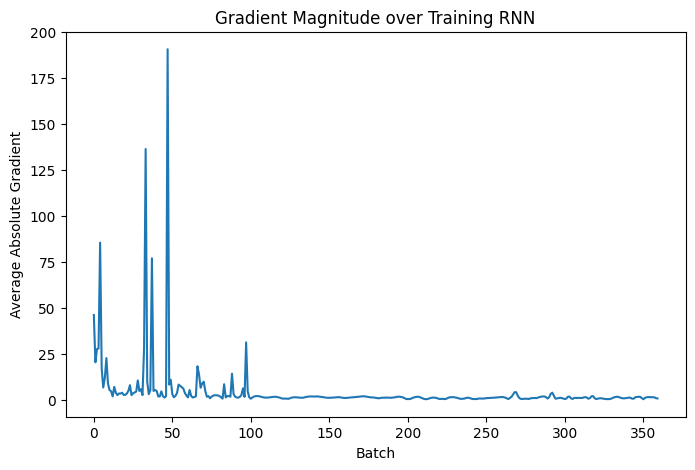

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(grad_logger_RNN.gradient_values)
plt.title("Gradient Magnitude over Training RNN")
plt.xlabel("Batch")
plt.ylabel("Average Absolute Gradient")
plt.show()

# Exercise 5: Applications in Text Classification and Sequence Modeling

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('/kaggle/input/stock-news-sentiment-analysismassive-dataset/Sentiment_Stock_data.csv')
data = data.sample(10000).reset_index(drop = True)
data

,Unnamed: 0,Sentiment,Sentence
0,71341,1,b'Italian oil slick reaches key farm center of...
1,96705,0,Malaysian Military official tells Reuters plan...
2,32289,1,"Chief executive, London Archives, Libraries an..."
3,36773,1,"Second sight, Victor Keegan"
4,49531,0,Why Reyes left Arsenal
...,...,...,...
9995,107139,1,Ecuador said Monday a World Bank arbitration p...
9996,90740,1,Chinese gaming addict spends six solid years a...
9997,40817,1,Animal charm
9998,67135,0,"b""AEG live is out of pocket to the tune of 300..."


In [24]:
# Преобразуем текст в последовательности
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['Sentence'])

sequences = tokenizer.texts_to_sequences(data['Sentence'])
padded = pad_sequences(sequences, maxlen=10, padding='post')

labels = data['Sentiment'].values

X_train, X_val, y_train, y_val = train_test_split(padded, labels, test_size = 0.2, random_state = 42)

model_RNN = Sequential([
    Embedding(input_dim=1000, output_dim=32, input_length=10),
    SimpleRNN(16, return_sequences=True),
    SimpleRNN(16, return_sequences=True),
    SimpleRNN(16, return_sequences=False),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_RNN.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
history_RNN = model_RNN.fit(
    X_train, y_train,
    validation_data = [X_val, y_val],
    epochs=15,
    verbose=1
)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5014 - loss: 0.6958 - val_accuracy: 0.5285 - val_loss: 0.6952
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5410 - loss: 0.6847 - val_accuracy: 0.4965 - val_loss: 0.7018
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6300 - loss: 0.6400 - val_accuracy: 0.5190 - val_loss: 0.7464
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6963 - loss: 0.5686 - val_accuracy: 0.5130 - val_loss: 0.7682
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7651 - loss: 0.4884 - val_accuracy: 0.5140 - val_loss: 0.8331
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8151 - loss: 0.4104 - val_accuracy: 0.5120 - val_loss: 0.9934
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8285 - loss: 0.3513 - val_accuracy: 0.5175 - val_loss: 1.1218
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8636 - loss: 0.2940 - val_accuracy: 0

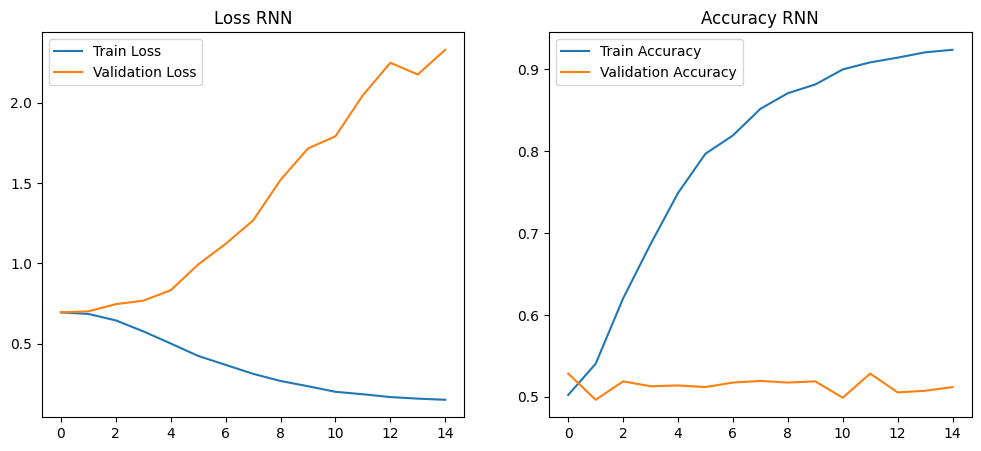

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['loss'], label='Train Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss RNN')

plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['accuracy'], label='Train Accuracy')
plt.plot(history_RNN.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy RNN')
plt.show()